### 서울시 구별 인구현황 및 CCTV 현황분석
####  -적절한 설치 비율을 통계를 통해서 시각화
####  - 평균이동선을 구현
####  - pandas  사용(기본 사용법)
####  -matplotlib 사용 (기본 차트 사용법)

#### 데이터 수집 및 로드


In [1]:
import pandas as pd

In [3]:
s_cctv=pd.read_csv('../data/seoul_cctv.csv', encoding='utf-8')

In [4]:
print(s_cctv.head())

   기관명    소계  2013년도 이전  2014년  2015년  2016년
0  강남구  3238       1292    430    584    932
1  강동구  1010        379     99    155    377
2  강북구   831        369    120    138    204
3  강서구   911        388    258    184     81
4  관악구  2109        846    260    390    613


In [5]:
s_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
s_cctv.columns[2]

'2013년도 이전'

In [7]:
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [8]:
s_cctv.index[1]

1

In [9]:
dic={s_cctv.columns[0]:'자치구'} # 딕셔너리 형태로 사용
s_cctv.rename(columns=dic, inplace=True) #inplace 원본에서 직접 고치겠다 라는 뜻

In [10]:
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [12]:
s_pop=pd.read_excel('../data/Report.xls', encoding='utf-8')

In [13]:
s_pop.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.2/4,합계,4241547,10089517,4935944,5153573,9814049,4802769,5011280,275468,133175,142293,2.31,1393671
3,2018.2/4,종로구,73655,163569,79522,84047,153780,75247,78533,9789,4275,5514,2.09,26512
4,2018.2/4,중구,61091,135427,66673,68754,126032,62260,63772,9395,4413,4982,2.06,21798


In [15]:
# 칼럼에 불필요하게 2개 더 들어가 있음                 #2부터 읽어온다
s_pop=pd.read_excel('../data/Report.xls', encoding='utf-8', header=2, usecols='B,D,G,J,N'  )

In [16]:
dic={s_pop.columns[1]:'인구수',
     s_pop.columns[2]:'한국인',
     s_pop.columns[3]:'외국인',
     s_pop.columns[4]:'고령자'}

s_pop.rename(columns=dic, inplace=True)
s_pop.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [17]:
dic={'계':'인구수',
     s_pop.columns[2]:'한국인',
     s_pop.columns[3]:'외국인',
     s_pop.columns[4]:'고령자'}

s_pop.rename(columns=dic, inplace=True)
s_pop.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [18]:
s_cctv.sort_values(by='소계',ascending=True).head(3) # sort_values 정렬 ascending 내림차순으로

,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174


In [19]:
s_cctv.sort_values(by='소계',ascending=False).head(3)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398


##### - cctv 집계수를 보고 여러 가설들이 발생될 수 있다
##### - 해당 자치구의 주거지역/상업지역/지하철 부분도 고려되면 좋겠다는 예상
##### - 주거지역 cctv가 낮고, 상업지역은 높아보임
##### - 2013도 이전 데이터 대비 3년간 증가된 cctv수에 대한 증가율 살펴봄
##### - 최근 3년간 증가율=(2014+2015+2016)/2013*100
##### - 최근 증가율이라는 컬럼명으로 추가

In [20]:
s_cctv.columns[3:]

Index(['2014년', '2015년', '2016년'], dtype='object')

In [21]:
s_cctv[s_cctv.columns[3:]].cumsum(axis=1).head(2)

,2014년,2015년,2016년
0,430,1014,1946
1,99,254,631


In [22]:
# 2016년도 데이터만(누적함의 데이터가 모인곳)
s_cctv[s_cctv.columns[3:]].cumsum(axis=1)[s_cctv.columns[-1:]].head(2)

,2016년
0,1946
1,631


In [23]:
csum=s_cctv[['2014년','2015년','2016년']].cumsum(axis=1)
csum['2016년'].head(2) # 위에꺼랑 같은 말

0    1946
1     631
Name: 2016년, dtype: int64

In [24]:
# 위의 데이터를 series로 구성 -> 차원 축소 -> 슬라이싱 -> 인덱싱
tmp=s_cctv[s_cctv.columns[3:]].cumsum(axis=1)[s_cctv.columns[-1]]

In [25]:
s_cctv['최근 증가율']=tmp/s_cctv[s_cctv.columns[2]]*100
# s_cctv['최근 증가율']=tmp/s_cctv['2013년도 이전']*100
s_cctv['최근 증가율2']=(s_cctv['2014년']+s_cctv['2015년']+s_cctv['2016년'])/s_cctv['2013년도 이전']*100

In [26]:
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,최근 증가율2
0,강남구,3238,1292,430,584,932,150.619195,150.619195
1,강동구,1010,379,99,155,377,166.490765,166.490765


In [27]:
# 더미데이터 제거
try:
    del s_cctv['최근 증가율2']
except Exception as e:
    print(e)
s_cctv.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765


### 인구현황분석

In [28]:
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512


In [29]:
# 0번행 제거
s_pop.drop([0], inplace=True)
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798


In [30]:
# 데이터 프레임의 고유값, 키로 검토중인 => 자치구
# 고유함 검사
s_pop['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [31]:
len(s_pop['자치구'].unique())

25

In [32]:
len(s_pop.index) # 행이 개수와 자치구 컬럼데이터의 중복 제거 후 개수가 동일하므로 고유하다

25

In [33]:
# NaN 있을 경우 제가해야한다
# NaN 데이터 추출

s_pop['자치구'].isnull().any()

False

In [34]:
# 체크방법
s_pop[s_pop['자치구'].isnull()].index

Int64Index([], dtype='int64')

In [35]:
# NaN이 존재라면 해당 행을 모두 제거
if s_pop['자치구'].isnull().any():
    index=s_pop[s_pop['자치구'].isnull()].index
    s_pop.drop([index], inplace=True)
    print('nan 제거됨')
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798


In [36]:
# 전체 인구 대비 외국인 비율, 고령자 비율 계산
s_pop['외국인비율']=s_pop['외국인']/s_pop['인구수']*100
s_pop['고령자비율']=s_pop['고령자']/s_pop['인구수']*100
s_pop.head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756


In [37]:
# 외국인 비율 기준 내림차순 정렬해서 샘플로 2개 출력
s_pop.sort_values(by='외국인비율', ascending=False).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404501,369003,35498,54994,8.775751,13.595516
18,금천구,252752,233263,19489,34945,7.710720,13.825806


In [38]:
s_pop.sort_values(by='고령자비율', ascending=True).head(2)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673161,666439,6722,79093,0.998572,11.749492
23,강남구,551888,546952,4936,66011,0.894384,11.960941


### 데이터 병합
####  - 인구대비 CCTV 주제를 분석하기 위해서
####  - 개별 데이터프레임을 하나로 합쳐야 함

In [39]:
# 교집합 -> on이 교집합 
# 합집합 -> on= left는 s_cctv로 합 right는 pop으로 데이터가 없는 것이 합쳐질때 생기거나 하는게 아니라 NaN으로 표시됨

data_result=pd.merge(s_cctv, s_pop, on='자치구')
data_result.head(2)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [40]:
# 2013년도 이전*2014 ---------- *2015년 --- 2016년 제거
try:
    del data_result['2013년도 이전']
    del data_result['2014년']
    del data_result['2015년']
    del data_result['2016년']
except Exception as e:
    print(e)

In [41]:
data_result.head(2)

,자치구,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [42]:
# 인덱스가 단순히 0~ 시작하는 의미없는 숫다
# 2차원 시각화 할 때 (x좌표->좌우, y좌표->상하)
# 키로 사용한 그리고, 고유값을 가진 컬럼 => 자치구 -> 인덱스로 변경
# 특정 칼럼의 인덱스 화
data_result.set_index('자치구',inplace=True)
data_result.head(2)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575


In [62]:
import numpy as np
# CCTV 소계 대비 인구수, 고령자비율, 외국인비율 어떤 상관이 있는지 체크
# 상관계수 : 0.1 이하: 무시
# ~0.3 이하: 약한 상관 관계
# ~0.7 이하: 강한 상관 관계
# np.corrcoef(): 상관 계수 계산 함수

np.corrcoef(data_result['인구수'], data_result['소계'])
# 대각선을 기준으로 대칭인 행렬
# 대각선을 제외하고 값을 확인하면 됨


array([[1.        , 0.22536935],
       [0.22536935, 1.        ]])

In [44]:
np.corrcoef(data_result['외국인비율'], data_result['소계']) #-> 약한 상관관계

array([[ 1.        , -0.04749504],
       [-0.04749504,  1.        ]])

In [45]:
np.corrcoef(data_result['고령자비율'], data_result['소계']) #-> 약한 상관관계

array([[ 1.        , -0.26836087],
       [-0.26836087,  1.        ]])

In [46]:
# 외국인비율과 고령자비율은 CCTV설치 와 연관성 X

In [47]:
# CCTV 소계 중심 정렬
# CCTV 소계 대비 인구에 대한 결과치가 잘 안보인다 -> 시각화😊❤💜💜
data_result.sort_values(by="소계", ascending=False).head(3)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
양천구,2482,34.671731,471026,467151,3875,56742,0.822672,12.046469
서초구,2297,63.371266,443989,439844,4145,54614,0.933582,12.300755


In [48]:
data_result.sort_values(by="인구수", ascending=False).head(3)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
송파구,1081,104.347826,673161,666439,6722,79093,0.998572,11.749492
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
노원구,1566,188.929889,553177,549365,3812,75741,0.689110,13.692001


### 시각화(플로팅)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform # 한글처리
from matplotlib import font_manager,rc

In [50]:
platform.system()
#import matplotlib.pyplot as plt
#mpl.matplotlib_fname()
font_list=font_manager.findSystemFonts(fontpaths=None,fontext='ttf')#폰트 뭐 깔려 있는지 찾기.
[s for s in font_list if "Nanum" in s]
#plt.rc('font',family='NanumGothic')
# font_manager.FontProperties.get_name

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf']

In [51]:
#한글처리모든 방법 한번에 찾는 코드
plt.rcParams['axes.unicode_minus']=False
if platform.system()=='Darwin':#맥
    font_list_mac=fm.OSXInstalledFonts()
    rc('font',family='Applegothic')
elif platform.system()=='Linux':#리눅스
    rc('font',family='NanumGothic')
elif platform.system()=='Windows':#윈도우
    #폰트 차후 확인
    #fontName=font_manager.fontProperties(fname=fontPath).get_name()
    rc('font',family='NanumGothic')
else:
    print('알수없는 시스템.미적용')

In [52]:
data_result.head(2)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575


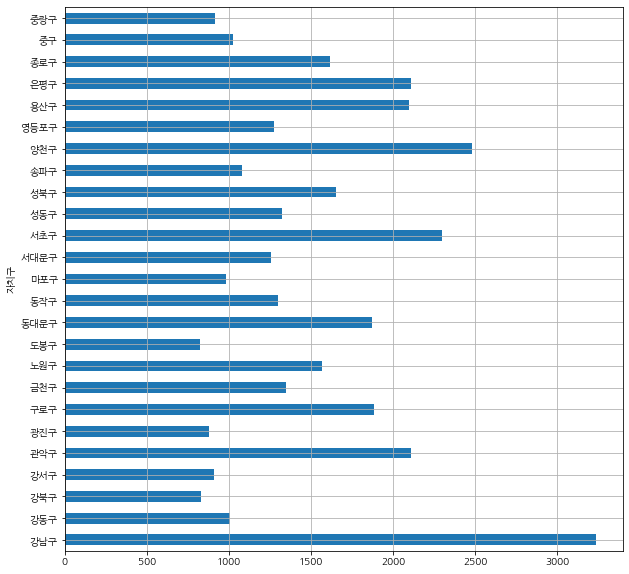

In [53]:
plt.figure()
#차트모양;barh:bar + h(수평선 차트 드로잉)
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
# #해당 컬러만 소트해서 시각화
# data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()
#소개가 많은 순부터 시각화 하시오

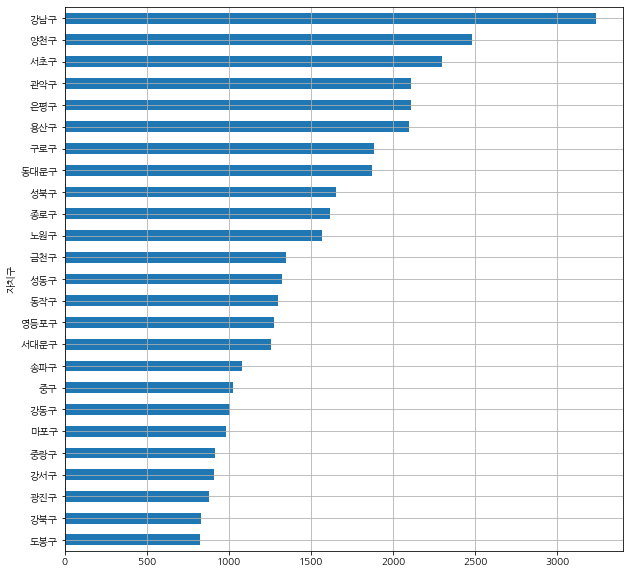

In [54]:
plt.figure()
#해당 컬러만 소트해서 시각화
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
#내림차순으로 정렬하여 그래프 정렬 > sort_values()
plt.show()

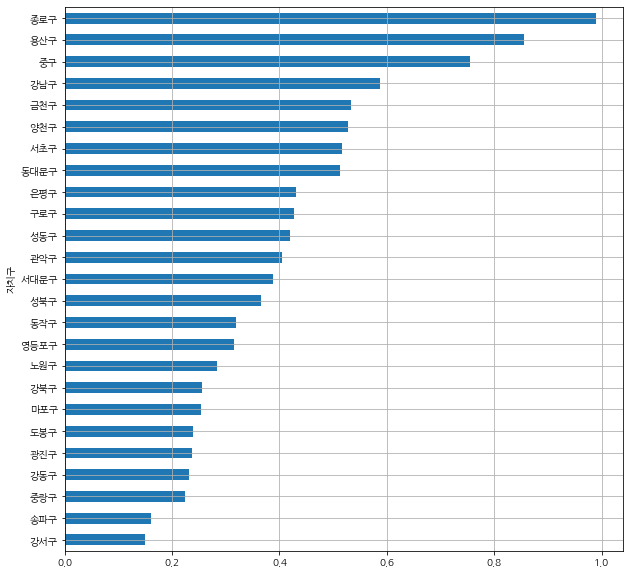

In [55]:
#인구당cctv 설치/비율
#CCTV비율 = 소계/인구수 *100
data_result['CCTV비율']=data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()
#종로구가 인구대비 가장 많이 CCTV를 설치한 지역
# 인구대비 설치 비율이 적절한지 판단 > 적절한 설치 비율을 찾아야 한다.

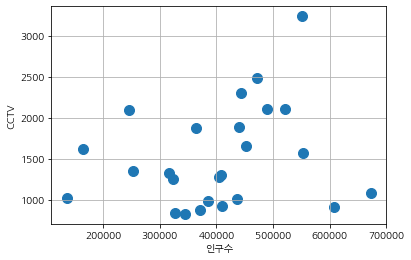

In [60]:
#x축 인구수, y축은 cctv수는 분포도 표현
plt.scatter(data_result['인구수'],data_result['소계'], s=100)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [64]:
#numpy에서 지원되는 함수를 이용하여
#인구수:입력 소계:출력 > 이것을 만족하는 함수(모델)을 생성
#함수를 1차,2차,3차,~15차,1차만 수행
#입력대비 출력을 만족하는 1차 함수 생성
#1차함수 y=ax+b>기울기, 절편
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) #기울기를 만들어주는 함수 polyfit
fp1
#[기울기, 절편]

array([1.08389848e-03, 1.07787951e+03])

In [65]:
#함수 생성
f1=np.poly1d(fp1)

In [66]:
#x값은 100000~700000 사이 100씩 증가
x=np.linspace(100000, 700000, 100)

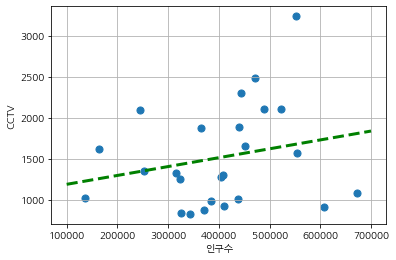

In [67]:
#시각화 
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
#인구 대비 cctv의 관계를 1차함수로 표현한 선
plt.plot(x, f1(x), ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()